In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns

In [6]:
# check current path
import os
print(os.getcwd())

# Load the Drive helper and mount
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive/')

path_gdrive = '/content/drive/Shareddrives/Enova/2023/Project_decription'
os.chdir(path_gdrive)
print(os.getcwd())

/content/drive/Shareddrives/Enova/2023/Project_decription
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/Shareddrives/Enova/2023/Project_decription


In [9]:
train = pd.read_csv('train_transformed.csv')
train.head()

,age,residence_type,education_level,job_type,number_years_at_job,marital_status,num_tickets_purchased,gym_membership_ind,prior_year_spend,prior_year_spend_external,primary_credit_card,other_streaming_services,promotion_type,conversion_ind,ltv,searched_wrest
0,74,U,grad_high_school,government,10,1,1.0,1,9.1,5.20,maincard,3,3,0.0,0.000000,1
1,51,U,phd,healthcare,7,0,2.0,0,27.45,247.43,maincard,2,3,1.0,3147.898930,1
2,42,U,grad_high_school,service,7,1,4.0,0,63.63,69.45,passport,5,3,0.0,0.000000,1
3,61,U,grad_college,retail,8,1,0.0,0,23.16,482.98,passport,2,1,1.0,1569.613367,0
4,48,S,masters_professional,education,6,1,2.0,1,None,170.83,pursuit,2,2,1.0,3411.585503,1


In [11]:
train['prior_year_spend'] = train['prior_year_spend'].replace('None', '0')
train['prior_year_spend'] = train['prior_year_spend'].astype(float)
train['prior_year_spent_ttl'] = train['prior_year_spend'] + train['prior_year_spend_external']

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


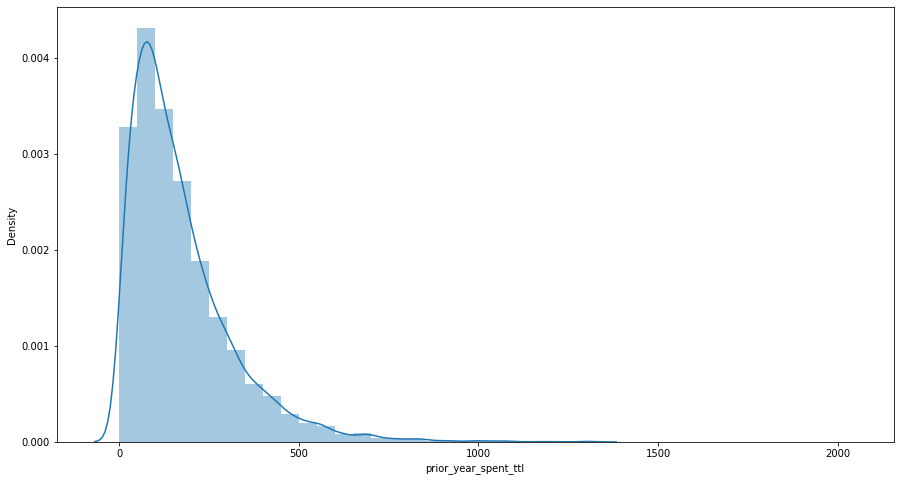

In [26]:
plt.figure(figsize = (15,8))
p = sns.distplot(train[train['prior_year_spent_ttl'] < 2000]['prior_year_spent_ttl'], bins=np.arange(0, 2100, 50))

In [36]:
## Set up the data and random seed

# Use transforemd dataset
df = train.copy()
df = df[[i for i in df.columns if i not in ['prior_year_spend', 'prior_year_spend_external']]]

# transform dtype
train['age'] = train['age'].astype(float)

promo_type = df['promotion_type']
conv_ind = df['conversion_ind']
ltv = df['ltv']
df = df.drop(['promotion_type', 'conversion_ind', 'ltv'], axis=1)

In [37]:
dfX_dum = pd.get_dummies(df, drop_first=True)
dfX_dum.head()

,age,number_years_at_job,marital_status,num_tickets_purchased,gym_membership_ind,other_streaming_services,searched_wrest,prior_year_spent_ttl,residence_type_S,residence_type_U,...,job_type_tech,primary_credit_card_None,primary_credit_card_PASSPORT,primary_credit_card_SLAMEX,primary_credit_card_locate,primary_credit_card_mainCard,primary_credit_card_maincard,primary_credit_card_passport,primary_credit_card_passsport,primary_credit_card_pursuit
0,74,10,1,1.0,1,3,1,14.30,0,1,...,0,0,0,0,0,0,1,0,0,0
1,51,7,0,2.0,0,2,1,274.88,0,1,...,0,0,0,0,0,0,1,0,0,0
2,42,7,1,4.0,0,5,1,133.08,0,1,...,0,0,0,0,0,0,0,1,0,0
3,61,8,1,0.0,0,2,0,506.14,0,1,...,0,0,0,0,0,0,0,1,0,0
4,48,6,1,2.0,1,2,1,170.83,1,0,...,0,0,0,0,0,0,0,0,0,1


In [39]:
from sklearn.preprocessing import MinMaxScaler

X,y = dfX_dum, conv_ind

scaler = MinMaxScaler()
features = X.columns.values

X_minmax = scaler.fit_transform(X)

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

## RFECV: best number of features with GridSearchCV and DecisionTree

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

rf = RandomForestClassifier()
dtree = DecisionTreeClassifier(random_state=123)
extree = ExtraTreesClassifier(n_estimators=10, max_depth=5) # use 5 for safe 

pipe = make_pipeline(RFE(estimator=rf, step=1))


parameters = {'rfe__n_features_to_select': range(1, 30)} # range based on your number of features

grid = GridSearchCV(pipe, param_grid=parameters, cv=10, n_jobs=-1)
grid.fit(X_train, y_train)

print('Best params:', grid.best_params_)
print('Best accuracy:', grid.best_score_)
print('Accuracy on test dataset', grid.best_estimator_.score(X_test, y_test))

## RandomForest based classifier

Ref: https://www.kaggle.com/code/residentmario/automated-feature-selection-with-sklearn/notebook

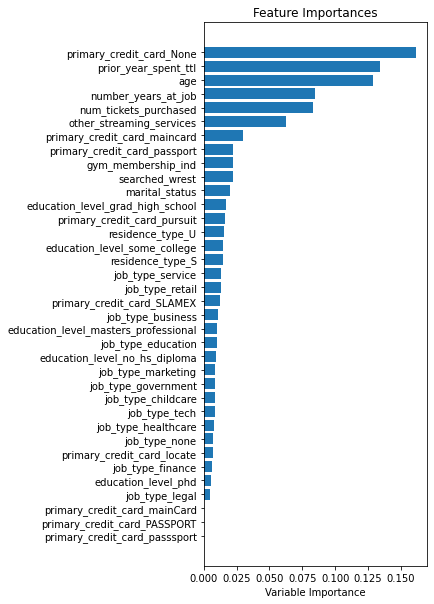

In [41]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

importances = clf.feature_importances_
indices = np.argsort(importances)

# Plot featrue importances
fig = plt.subplots(figsize=(4,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Variable Importance')
plt.show()